# Emisiones de CO2 en el mundo

## Setup

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import plotly.graph_objects as go
import plotly.subplots as sp
import json

In [152]:
# Mostrar todas las columnas del dataset
pd.set_option('display.max_columns', None)

## Importacion y limpieza

In [153]:
#Leemos el dataset saltandonos las primeras 3 filas porque forman parte de un encabezado que no nos interesa e impiden la lectura del dataset
df_emisiones = pd.read_csv('Datasets\Emisiones_co2.csv', skiprows=[0, 1, 2])

In [154]:
# Mostrmos el Dataset original
df_emisiones

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,0.891352,0.958883,0.961553,0.988083,1.032476,1.008065,0.996423,1.013249,1.053663,0.990734,1.017488,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,0.055167,0.055293,0.066810,0.073005,0.054867,0.080361,0.089757,0.109940,0.165573,0.239507,0.304230,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,0.521689,0.533552,0.486596,0.505791,0.497074,0.490734,0.452813,0.426842,0.436977,0.409795,0.447817,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,0.988416,0.941818,0.895717,0.924988,0.929811,0.812875,0.821264,0.811414,0.888610,0.939457,0.975917,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496616,0.611585,0.632544,0.570608,0.600495,0.654007,0.649987,0.680397,0.707366,0.776116,0.806846,0.839206,0.818574,0.926241,0.946723,0.989913,0.997824,1.027766,1.038030,1.105666,1.027803,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515,NaN,NaN,NaN
263,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.209373,5.922276,5.717823,5.795258,5.826213,6.007616

¿Que limpieza de datos requiere el dataset?
* Hay registros que se corresponen con territorios que no son países, sino mas bien regiones.
* No hay registro de datos entre 1960 y 1989. Dicho de otra forma, hay informacion a partir de 1990.
* No hay registro de los años 2021 y 2022
* Hay países que no tienen nigun tipo de datos, en ningun año.


En cuanto a los registros de regiones que no son paises, existe un dataset que contiene metadatos al respecto de este tema.
En él, los registros que no son países tiene en las columnas "Region" y "IncomeGroup" valor NaN. Con lo cual, se podría limpiar este dataset en funcion de ese criterio y luego hacer un merge con el dataset original que contiene los datos de emision.

In [155]:
# Importamos el dataset de paises
df_paises = pd.read_csv('Datasets\Metadatos_paises.csv')
df_paises.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [156]:
# Unimos ambos dataset en funcion de "Country Code"
merge = pd.merge(df_emisiones,df_paises, on = "Country Code")
merge.shape

(265, 73)

In [157]:
#visualizamos el df unido
merge.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,0.891352,0.958883,0.961553,0.988083,1.032476,1.008065,0.996423,1.013249,1.053663,0.990734,1.017488,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,0.055167,0.055293,0.066810,0.073005,0.054867,0.080361,0.089757,0.109940,0.165573,0.239507,0.304230,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,0.521689,0.533552,0.486596,0.505791,0.497074,0.490734,0.452813,0.426842,0.436977,0.409795,0.447817,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,0.988416,0.941818,0.895717,0.924988,0.929811,0.812875,0.821264,0.811414,0.888610,0.939457,0.975917,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [158]:
merge = merge[pd.notnull(merge['Region'])] # Se eliminan los registros con valores nulos en la columna Region

In [159]:
merge.head()    # Mostramos el dataset con los valores nulos eliminados

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,0.055167,0.055293,0.066810,0.073005,0.054867,0.080361,0.089757,0.109940,0.165573,0.239507,0.304230,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,0.988416,0.941818,0.895717,0.924988,0.929811,0.812875,0.821264,0.811414,0.888610,0.939457,0.975917,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
5,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.844035,1.261054,0.689644,0.644008,0.649938,0.612055,0.621206,0.469831,0.576804,0.960297,1.031568,1.056868,1.233002,1.361159,1.427944,1.360092,1.363989,1.433797,1.428250,1.492117,1.642762,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,NaN,NaN,NaN,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
6,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.592152,7.336725,7.099907,6.937048,6.663237,6.754132,7.082732,7.194088,7.531924,7.812962,7.927016,7.725627,7.498765,7.238069,7.286756,7.206274,6.805400,6.890390,7.081822,6.995396,7.223591,6.957586,6.862293,6.674233,6.445931,6.485769,6.465288,6.302098,6.594057,6.287204,5.777148,NaN,NaN,NaN,Europe & Central Asia,High income,NaN,Andorra,NaN


In [160]:
merge.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

In [161]:
for i in range(1960,1990): # Se eliminan los registros anteriores a 1990
    columna = str(i) 
    merge = merge.drop(columna, axis=1)
merge = merge.drop(['2021','2022'], axis=1) # Se eliminan los registros posteriores a 2020
merge = merge.drop('Unnamed: 67',axis=1) # Se elimina la columna Unnamed: 67 ya que no aporta informacion
merge = merge.drop('Indicator Code',axis=1) 
merge = merge.drop('Indicator Name',axis=1)
merge = merge.drop('SpecialNotes',axis=1)
merge = merge.drop('TableName',axis=1)
merge = merge.drop('Unnamed: 5',axis=1)

merge = merge.dropna() # Se eliminan los registros con valores nulos

In [162]:
merge.columns

Index(['Country Name', 'Country Code', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Region', 'IncomeGroup'],
      dtype='object')

In [163]:
#Reordenamos las columnas
merge = merge[['Country Name', 'Country Code', 'Region', 'IncomeGroup', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [164]:
merge.shape

(189, 35)

In [165]:
merge.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,4.296842,4.196407,4.166997,4.122210,4.111455,4.091839,4.166496,4.201664,4.195502,4.179677,4.178612,4.245649,4.271949,4.399246,4.463921,4.474407,4.537063,4.517589,4.482156,4.260298,4.383070,4.373887,4.372442,4.327325,4.226686,4.165151,4.153413,4.155005,4.141122,4.087499,3.810736
std,5.586616,5.576652,5.391433,5.472059,5.598376,5.464924,5.591990,5.760064,5.689664,5.730649,5.659189,5.678374,5.824965,5.967319,6.048940,6.016106,5.983968,5.771965,5.630014,5.268871,5.416531,5.440304,5.446902,5.353100,5.201267,5.044822,4.947876,4.855053,4.764173,4.707587,4.629232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031942,0.024953,0.022414,0.021790,0.025019,0.024180,0.024003,0.022746,0.035424,0.037998,0.037180,0.025112,0.027174,0.034194,0.029732,0.033755,0.032311,0.033715,0.032585
25%,0.356578,0.377791,0.488610,0.461841,0.437938,0.461849,0.467447,0.496866,0.540249,0.544094,0.547470,0.573353,0.595750,0.595200,0.606844,0.629559,0.616095,0.584950,0.614453,0.597225,0.632449,0.642742,0.626318,0.633609,0.659481,0.707916,0.691117,0.713598,0.762550,0.770102,0.645350
50%,1.634929,1.763473,1.851136,1.851630,1.821518,1.828330,1.814195,1.897185,2.005780,2.040444,2.129599,2.163438,2.168815,2.127111,2.198379,2.188196,2.305933,2.397519,2.409061,2.409401,2.508908,2.441544,2.526658,2.531078,2.619452,2.584027,2.604352,2.547316,2.609707,2.820964,2.404684
75%,6.770626,6.489709,6.546546,6.480989,6.321099,6.302809,6.222700,6.375622,6.369795,6.216039,6.076553,6.176286,6.296279,6.543196,6.472604,6.440996,6.539718,6.711370,6.654714,6.015761,6.159973,6.199227,6.138738,6.039376,5.617286,5.670138,5.824503,5.756134,5.821777,5.595284,4.923280
max,29.553490,32.826856,31.143259,34.183536,36.931552,36.976276,39.568269,46.118807,45.615898,47.288938,44.379251,42.205792,45.564691,46.416887,47.656962,45.406087,43.288574,40.609452,36.889946,33.727304,35.548268,37.979493,39.582140,37.602880,37.105034,35.290422,33.549569,32.256638,31.480967,31.877203,31.726842


In [166]:
#Con el dataset limpio, lo copiamos a una variable mas generica
df = merge.copy()

In [167]:
#Chequeamos que se haya hecho correctamente la copia
df.shape

(189, 35)

In [168]:
#Nombres de las columnas
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

## Analisis exploratorio de los datos

### Grafico 1: Tendencia de Emisiones de CO2 per cápita para 20 Países Aleatorios

A raiz de la enorme cantidad de paises se ha desarrollado un codigo que grafica 20 paises aleatorios cada vez que se ejecuta la celda con el objetivo de poder visualizar demanera mas claras tendencias a lo largo de los años. El grafico que incluia todos los paises sólo aportaba confusión. 

In [169]:
anios = df.columns[4:]

# Seleccionamos aleatoriamente 20 países
paises_aleatorios = random.sample(list(df['Country Name'].unique()), 20)

# Filtramos el DataFrame para incluir solo esos 20 países
df_seleccionados = df[df['Country Name'].isin(paises_aleatorios)]

# Crea el gráfico de líneas
fig = go.Figure()

for index, row in df_seleccionados.iterrows():
    fig.add_trace(go.Scatter(x=anios, y=row[2:], mode='lines', name=row['Country Name']))

fig.update_layout(
    title='Tendencia de Emisiones de CO2 per cápita para 20 Países Aleatorios',
    xaxis_title='Año',
    yaxis_title='Emisiones CO2 per cápita',
    height=600,
    width=1000
)

fig.show()


 ### Grafico 2: Comparación de Emisiones de CO2 per cápita entre 1990 y 2020

In [170]:
import plotly.express as px

# Seleccionamos los años de inicio y fin de las mediciones diponibles
anio1 = '1990'
anio2 = '2020'

# Creamos el gráfico de dispersión
fig = px.scatter(df, x=anio1, y=anio2, color='Country Name',
                 title=f'Comparación de Emisiones de CO2 per cápita entre {anio1} y {anio2}')

# Agregamos la línea diagonal de relacion 1:1 para poder analizar la tendencia
fig.add_shape(
    type='line',
    x0=df[anio1].min(),
    y0=df[anio2].min(),
    x1=df[anio1].max(),
    y1=df[anio2].max(),
    line=dict(color='red', width=2)
)

fig.update_layout(height=600, width=800)
fig.show()


Conclusiones:

Puntos Cerca de la Línea Diagonal:

Si los puntos están cerca de la línea diagonal que representa una relación 1:1, significa que las emisiones de CO2 per cápita no han cambiado significativamente entre los dos años. Esto podría indicar cierta estabilidad en las emisiones.

Puntos Por Encima de la Línea Diagonal:

Los puntos por encima de la línea diagonal indican un aumento en las emisiones de CO2 per cápita entre los dos años. Esto podría sugerir un aumento en la actividad económica, industrialización o cambio en los patrones de consumo.

Puntos Debajo de la Línea Diagonal:

Los puntos por debajo de la línea diagonal indican una disminución en las emisiones de CO2 per cápita. Esto podría deberse a medidas de sostenibilidad, cambios en la matriz energética o políticas ambientales.


### Grafico 3: Tendecias en las emisiones de CO2 de acuerdo a los ingresos

In [171]:
df_ingresos = df.groupby('IncomeGroup').mean().reset_index()


In [172]:
#Graficamos emsiones de acuerdo a los ingresos
# Crea el gráfico de líneas
fig = go.Figure()

for index, row in df_ingresos.iterrows():
    fig.add_trace(go.Scatter(x=anios, y=row[4:], mode='lines', name=row['IncomeGroup']))

fig.update_layout(
    title='Tendencia de Emisiones de CO2 promedio de acuerdo a los ingresos',
    xaxis_title='Año',
    yaxis_title='Emisiones CO2 promedio',
    height=600,
    width=1000
)

fig.show()

Conclusiones:
Sin lugar a dudas, las emisiones de CO2 estan relacionadas con el nivel de ingresos de los países evaluados. Aquí, pese a que no hay datos concretos en el DataFrame, se puede aclarar que existen abundantes pruebas sobre el incremento de los ingresos de los países cuando sus economias estan fuertemente diversificadas y basadas principalmente en la industria. Siguiendo esa línea, tambien abunda la evidencia de que las actividades industriales son las principales fuentes de generacion de CO2.


### Grafico 4: Tendencia de emisiones de CO2 en funcion de la region

In [173]:
df_region = df.groupby('Region').mean().reset_index()


In [174]:
#Graficamos emsiones de acuerdo a los ingresos
# Crea el gráfico de líneas
fig = go.Figure()

for index, row in df_region.iterrows():
    fig.add_trace(go.Scatter(x=anios, y=row[4:], mode='lines', name=row['Region']))

fig.update_layout(
    title='Tendencia de Emisiones de CO2 promedio de acuerdo a la region',
    xaxis_title='Año',
    yaxis_title='Emisiones CO2 promedio',
    height=600,
    width=1000
)

fig.show()

Grafico 7: Promedio de emisiones de todos los paises agrupados por region

In [175]:
df['Promedio'] = df.iloc[:, 4:].mean(axis=1)
df_promedio = df[['Country Name','Country Code', 'Region','Promedio']].sort_values(by='Promedio', ascending=False)
df_promedio

,Country Name,Country Code,Region,Promedio
199,Qatar,QAT,Middle East & North Africa,38.361207
8,United Arab Emirates,ARE,Middle East & North Africa,24.925986
126,Kuwait,KWT,Middle East & North Africa,23.522313
22,Bahrain,BHR,Middle East & North Africa,22.059208
143,Luxembourg,LUX,Europe & Central Asia,21.267820
...,...,...,...,...
172,Niger,NER,Sub-Saharan Africa,0.071236
212,Somalia,SOM,Sub-Saharan Africa,0.062380
34,Central African Republic,CAF,Sub-Saharan Africa,0.048568
43,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,0.043129


In [176]:
fig = px.bar(df_promedio, x="Region", y="Promedio", color="Country Name", title="Promedio de Emisiones de CO2 por País y Región")
fig.show()

In [177]:
# Crea el gráfico de torta con Plotly
fig = px.pie(df_promedio, values=df_promedio['Promedio'], names='Region',
             title=f'Promedio de emision por region a lo largo del tiempo', width=800, height=600)
fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10712\647364814.py:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



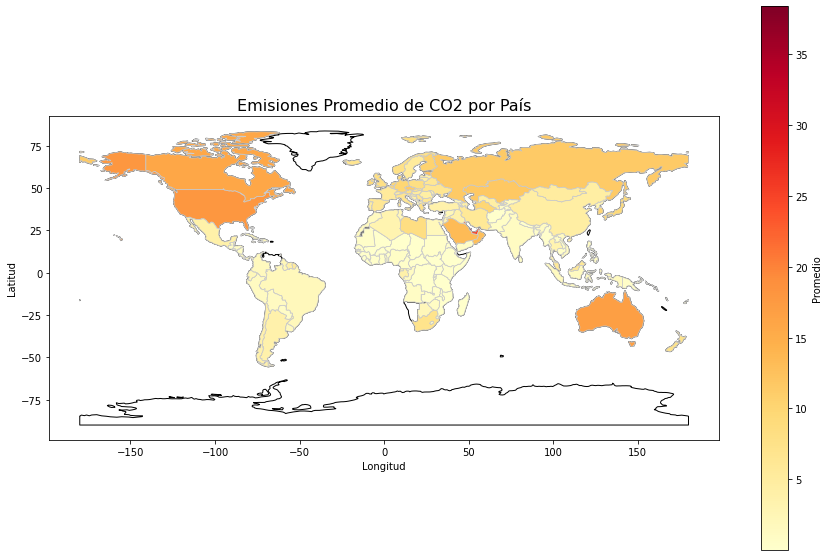

In [178]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar un conjunto de datos geoespaciales del mundo (necesitas un archivo shapefile del mundo)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionar los datos geoespaciales con los datos de emisiones promedio
world_emisiones = world.merge(df_promedio, how='left', left_on='iso_a3', right_on='Country Code')

# Configurar el tamaño de la figura
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Mostrar el mapa del mundo
world.plot(ax=ax, color='white', edgecolor='black') #Parametros para el mapa (donde no hay datos, se pone blanco)

# Graficar los países con emisión promedio
world_emisiones.plot(ax=ax, column='Promedio', cmap='YlOrRd', legend=True,
                     legend_kwds={'label': "Promedio"},
                     linewidth=0.8, edgecolor='0.8')
plt.title('Emisiones Promedio de CO2 por País', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()

## Analisis del cumplimiento del Protocolo de Kyoto

A continuacion, se conformorá una lista de los países miembro del protocolo de kyoto y se intentará demostrar si pudieron o no cumplir los compromisos asumidos en el para el periodo 2008-2012

In [179]:
paises = df_promedio['Country Name'].unique()
paises

array(['Qatar', 'United Arab Emirates', 'Kuwait', 'Bahrain', 'Luxembourg',
       'United States', 'Australia', 'Brunei Darussalam', 'Canada',
       'Saudi Arabia', 'Oman', 'Estonia', 'Kazakhstan',
       'Russian Federation', 'Czechia', 'Trinidad and Tobago', 'Palau',
       'Finland', 'Belgium', 'Korea, Rep.', 'Netherlands', 'Germany',
       'Turkmenistan', 'Ireland', 'Japan', 'Denmark', 'Singapore',
       'Israel', 'Libya', 'Poland', 'United Kingdom', 'Austria', 'Norway',
       'Greece', 'Slovenia', 'New Zealand', 'South Africa',
       'Slovak Republic', 'Andorra', 'Nauru', 'Italy', 'Iceland',
       'Cyprus', 'Ukraine', 'Serbia', 'Belarus', 'Spain', 'Bulgaria',
       'Bahamas, The', 'Iran, Islamic Rep.', 'Malaysia', 'Liechtenstein',
       'Malta', 'Switzerland', 'France', 'Sweden', 'Hungary', 'Mongolia',
       'Portugal', 'China', 'Antigua and Barbuda', 'Barbados', 'Romania',
       'Uzbekistan', 'Bosnia and Herzegovina', 'Seychelles',
       'St. Kitts and Nevis', 'Lithuan

En funcion de los paises de los que se tiene datos y los firmantes del tratado de kyoto se armo un listado con el que se filtramos el Dataset original y evaluaremos sus progresos de acuerdo a los compromisos asumidos.
Nota: Algunos no hay datos de Isalndia, Letonia, Mónaco, Suiza y Ucrania.

In [180]:
paises_miembro = ['Germany',
'Australia',
'Austria',
'Belgium'
'Bulgaria',
'Canada',
'Croatia',
'Denmark',
'Slovak Republic',
'Slovenia',
'Spain',
'United States',
'Estonia',
'Russian Federation',
'Finland',
'France',
'Greece',
'Hungary',
'Ireland',
'Italy',
'Japan',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Norway',
'New Zealand',
'Netherlands',    
'Poland',
'Portugal',
'United Kingdom',
'Czechia',
'Romania',
'Sweden']

In [181]:
#Dataframe con los datos de los paises miembro del protocolo de Kyoto
df_kyoto = df[df['Country Name'].isin(paises_miembro)]

In [182]:
df_kyoto.head()

,Country Name,Country Code,Region,IncomeGroup,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Promedio
13,Australia,AUS,East Asia & Pacific,High income,15.437183,15.315271,15.353974,15.481705,15.730915,16.114602,16.471014,16.706176,17.602334,17.737243,17.837318,17.930727,18.123211,17.894539,18.368871,18.278473,18.292750,18.454738,18.239290,18.157201,17.973752,17.656055,17.405618,16.794588,16.155745,16.198458,16.320331,16.148091,15.863562,15.595727,14.772658,16.916520
14,Austria,AUT,Europe & Central Asia,High income,7.590107,8.049526,7.354947,7.311748,7.344674,7.698070,8.154638,8.060212,8.107661,7.889457,7.930859,8.444656,8.583837,9.169317,9.275871,9.266406,8.962102,8.588766,8.500238,7.721228,8.365625,8.136190,7.723852,7.754018,7.260931,7.318860,7.290777,7.487037,7.141140,7.263331,6.632646,7.947701
35,Canada,CAN,North America,High income,15.148969,14.740964,15.028139,14.713309,15.060504,15.290466,15.592614,15.943848,16.076572,16.258473,16.757467,16.331437,16.720411,17.208359,16.794186,17.027568,16.595214,17.380631,16.559426,15.504506,15.794538,15.998272,15.736824,15.840810,15.852177,15.649907,15.421823,15.547195,15.636654,15.052747,13.599375,15.834303
54,Czechia,CZE,Europe & Central Asia,High income,14.820869,13.557360,13.261049,12.679965,12.115803,12.057321,12.455715,12.228668,11.634249,10.925849,12.161476,12.170511,11.788849,12.102504,12.139333,11.937227,11.969405,12.082229,11.432146,10.843240,10.899669,10.596338,10.210484,9.787677,9.497131,9.592920,9.747754,9.773987,9.664628,9.156118,8.304017,11.341758
55,Germany,DEU,Europe & Central Asia,High income,12.026580,11.654827,11.073759,10.930221,10.755340,10.708622,11.039972,10.637520,10.545805,10.153379,10.099366,10.293612,10.103011,10.138764,9.950446,9.729463,9.886480,9.527623,9.617458,8.971731,9.453389,9.299003,9.451289,9.624229,9.088528,9.087345,9.072972,8.858345,8.537043,7.927188,7.255221,9.854791


In [183]:
#Grafico de torta para detemrinar el porcetaje promedio de emision de cada region de los paises miembros
fig = px.pie(df_kyoto, values=df_kyoto['Promedio'], names='Region',
             title=f'Promedio de emision por region a lo largo del tiempo', width=800, height=600)
fig.show()

In [184]:
#Grafico de barras para determinar el promedio de emision de cada pais miembro
fig = px.bar(df_kyoto, x="Country Name", y="Promedio", color="Country Name", title="Promedio de Emisiones de CO2 por Estado Miembro")
fig.show()

### Evaluacion de los resultados obtenidos


In [185]:
# Definimos la emision esperada en 2012 como el 95% de la emision en 1997
df_kyoto['Resultados esperados en 2012'] = df_kyoto['1997'] * 0.95

# Calculo del porcentaje de emision en 2012 con respecto a la emision esperada en 2012
df_kyoto['Porcentaje de cumplimiento de la meta'] = (df_kyoto['Resultados esperados en 2012'] / df_kyoto['2012'] * 100).round(2)

# Categorizamos los paises en funcion del cumplimiento de la meta
df_kyoto['Cumplimiento de la meta'] = np.where(df_kyoto['Porcentaje de cumplimiento de la meta'] >= 100, 'Cumplio', 'No cumplio')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10712\2110727861.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10712\2110727861.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10712\2110727861.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [186]:
df_kyoto = df_kyoto[['Country Name', 'Country Code', 'Region','1997','2012','Promedio','Resultados esperados en 2012', 'Porcentaje de cumplimiento de la meta','Cumplimiento de la meta']]
df_kyoto

,Country Name,Country Code,Region,1997,2012,Promedio,Resultados esperados en 2012,Porcentaje de cumplimiento de la meta,Cumplimiento de la meta
13,Australia,AUS,East Asia & Pacific,16.706176,17.405618,16.916520,15.870867,91.18,No cumplio
14,Austria,AUT,Europe & Central Asia,8.060212,7.723852,7.947701,7.657201,99.14,No cumplio
35,Canada,CAN,North America,15.943848,15.736824,15.834303,15.146656,96.25,No cumplio
54,Czechia,CZE,Europe & Central Asia,12.228668,10.210484,11.341758,11.617235,113.78,Cumplio
55,Germany,DEU,Europe & Central Asia,10.637520,9.451289,9.854791,10.105644,106.92,Cumplio
58,Denmark,DNK,Europe & Central Asia,12.037353,6.834608,9.185913,11.435485,167.32,Cumplio
70,Spain,ESP,Europe & Central Asia,6.206173,5.778549,6.240855,5.895865,102.03,Cumplio
71,Estonia,EST,Europe & Central Asia,12.760310,12.844221,12.598072,12.122294,94.38,No cumplio
75,Finland,FIN,Europe & Central Asia,11.794931,9.126037,10.454598,11.205185,122.78,Cumplio
77,France,FRA,Europe & Central Asia,5.988675,5.152358,5.563564,5.689241,110.42,Cumplio


In [187]:
df_kyoto.to_excel('Datasets/cumplimiento.xlsx')

In [188]:
df_cumplimiento = df_kyoto.groupby(['Cumplimiento de la meta']).agg(
    Count=('Country Name', 'count'),
    Promedio=('Porcentaje de cumplimiento de la meta', 'mean')
).reset_index()
df_cumplimiento = df_cumplimiento.rename(columns={'Count': 'Cantidad de Paises', 'Promedio': 'Porcentaje promedio de alcance de la meta'})
df_cumplimiento

,Cumplimiento de la meta,Cantidad de Paises,Porcentaje promedio de alcance de la meta
0,Cumplio,21,116.342381
1,No cumplio,10,92.117000


In [189]:
df_cumplimiento.to_excel('Datasets/cumplimiento2.xlsx')

In [190]:
df_kyoto.columns

Index(['Country Name', 'Country Code', 'Region', '1997', '2012', 'Promedio',
       'Resultados esperados en 2012', 'Porcentaje de cumplimiento de la meta',
       'Cumplimiento de la meta'],
      dtype='object')

In [191]:
#Grafico de punto para evaluar la emision entre el año 1997 y el año 2012

# Seleccionamos los años de inicio y fin de las mediciones 
anio1 = '1997'
anio2 = '2012'

# Calcula el umbral de disminución del 5%
umbral_disminucion = df_kyoto[anio1] * 0.95

# Creamos el gráfico de dispersión
fig = px.scatter(df_kyoto, x=anio1, y=anio2, color='Country Name',
                 title=f'Comparación de Emisiones de CO2 per cápita entre {anio1} y {anio2}')

# Agregamos la línea diagonal de relacion 1:1 para poder analizar la tendencia
fig.add_shape(
    type='line',
    x0=df_kyoto[anio1].min(),
    y0=df_kyoto[anio2].min(),
    x1=df_kyoto[anio1].max(),
    y1=df_kyoto[anio2].max(),
    line=dict(color='red', width=2)
)

# Agregamos la línea diagonal del umbral de disminución del 5%
fig.add_shape(
    type='line',
    x0=df_kyoto[anio1].min(),
    y0=umbral_disminucion.min(),
    x1=df_kyoto[anio1].max(),
    y1=umbral_disminucion.max(),
    line=dict(color='orange', width=2, dash='dash')
)

fig.update_layout(height=600, width=800)
fig.show()

Segun el Articulo 3 del Protocolo de Kyoto, los paises miembros se comprometian a reducir en al menos un 5% las emisiones para el 2012. A continuacion evaluaremos los resultados obtenidos desde otra perpectiva

Si bien los resultados preliminares arrojan que 21 paises lograorn la meta y sólo 10 no lo lograron surge la pregunta acerca de cual es el peso en relacion a las emisiones totales de esos páises que incumplieron.

In [192]:
# Filtramos el DataFrame para incluir solo los datos del año 2012
df_2012 = df_kyoto[['Country Name', '2012', 'Cumplimiento de la meta']]

# Agrupamos por 'Cumplimiento de la meta' y calcula la suma de emisiones en 2012 para cada grupo
df_agrupado = df_2012.groupby('Cumplimiento de la meta').agg(
    Total_Emisiones_2012=('2012', 'sum')
).reset_index()

# Crea el gráfico de torta
fig = px.pie(df_agrupado, values='Total_Emisiones_2012', names='Cumplimiento de la meta',
             title='Porcentaje de Emisiones Totales en 2012 por Cumplimiento de la Meta')

fig.show()

Conclusion: El porcentaje de emision de los paises que cumplieron la meta es mayoritario. Sin embargo aquellos paises que no lograorn la meta tiene una representacion altisima dentro de las emsion del año 2012 por lo que, si bien podria considerarse un avance positivo, es evidente que los objetivos estan lejos de ser cumplidos.

In [193]:
# graficamos la proporcion de paises por region que cumplieron el protocolo
fig = px.pie(df_kyoto[df_kyoto['Cumplimiento de la meta'] == 'Cumplió'], values=df_kyoto['Region'].value_counts(), names=df_kyoto['Region'].unique(),
             title=f'Proporción de países que cumplieron con el Protocolo de Kyoto por Región', width=800, height=600)
fig.show()

Conclusión: Este grafico parecería indicar que los esfuerzo principales de la disminucion de emsiones provienen de la región 'East Asia and Pacific' sin embargo la cantidad de países dentro d ela región en comparacion con, por ejemplo, 'North America', podría ser indicador de una sobre representación de los resultados obtenidos como region. Por lo que se requieren analisis muchos mas profundos  detallados para evaluar este aspecto en particular. Aquí identificamos una nueva línea de investigaicon para futuros proyectos.

A partir de estos reusltados se podria ampliar la evaluacion del cumplimieto de este objetivo a todos los paises de los que se tiene dato para evaluar la posibibilidad de incoporacion a este tratado.
Asimismo, se procede a evaluar un valor umbral en el aumento de de las emsiones para detemrinar países cuya situacion es critica en temrinos de las consecuencias ambientales para todo el mundo. (Ver si es posible)

Ver si se puede hace run grafico del mundo coloreando los paises en funcion de su grado de cumplimiento

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10712\652930834.py:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



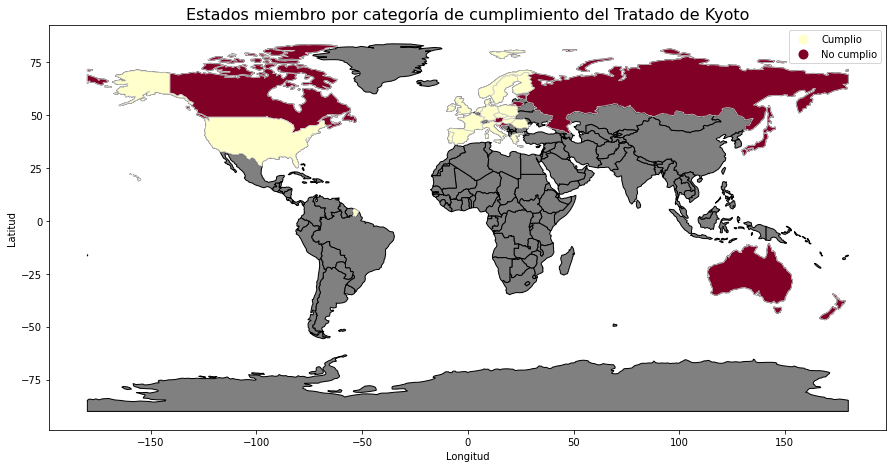

In [194]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar un conjunto de datos geoespaciales del mundo (necesitas un archivo shapefile del mundo)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionar los datos geoespaciales con los datos de emisiones promedio
world_emisiones = world.merge(df_kyoto, how='left', left_on='iso_a3', right_on='Country Code')

# Configurar el tamaño de la figura
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Mostrar el mapa del mundo
world.plot(ax=ax, color='grey', edgecolor='black') #Parametros para el mapa (donde no hay datos, se pone blanco)

# Graficar los países con emisión promedio
world_emisiones.plot(ax=ax, column='Cumplimiento de la meta', cmap='YlOrRd', legend=True,
                     #legend_kwds={'label': "Cumplimiento de la meta"},
                     linewidth=0.8, edgecolor='0.8')
plt.title('Estados miembro por categoría de cumplimiento del Tratado de Kyoto', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()

In [195]:
df_kyoto.columns

Index(['Country Name', 'Country Code', 'Region', '1997', '2012', 'Promedio',
       'Resultados esperados en 2012', 'Porcentaje de cumplimiento de la meta',
       'Cumplimiento de la meta'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10712\3439205393.py:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



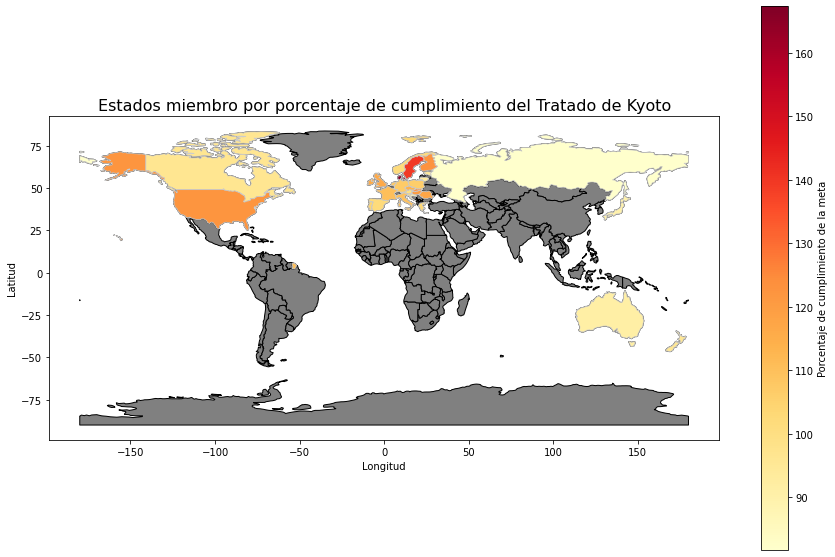

In [196]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar un conjunto de datos geoespaciales del mundo (necesitas un archivo shapefile del mundo)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionar los datos geoespaciales con los datos de emisiones promedio
world_emisiones = world.merge(df_kyoto, how='left', left_on='iso_a3', right_on='Country Code')

# Configurar el tamaño de la figura
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Mostrar el mapa del mundo
world.plot(ax=ax, color='grey', edgecolor='black') #Parametros para el mapa (donde no hay datos, se pone blanco)

# Graficar los países con emisión promedio
world_emisiones.plot(ax=ax, column='Porcentaje de cumplimiento de la meta', cmap='YlOrRd', legend=True,
                     legend_kwds={'label': "Porcentaje de cumplimiento de la meta"},
                     linewidth=0.8, edgecolor='0.8')
plt.title('Estados miembro por porcentaje de cumplimiento del Tratado de Kyoto', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()